In [3]:
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import time



import sys
import math
import time
from random import randint,choice, shuffle, random
from statistics import mode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import *
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix 

def specificity(y_true, y_predicted):
 tp,fp,fn,tn = confusion_matrix(y_true, y_predicted).ravel()
 s=tn/(tn+fp)
 return s

my_scorer = make_scorer(specificity, greater_is_better=True)





In [6]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/phishing.csv')

In [7]:
col_names=list(data.columns)
Att_names=col_names[:-1]
Class_names=data["class"].unique()

In [8]:
n_att = len(Att_names)
n_att

31

In [9]:
train_data, test_data = train_test_split(data, test_size=0.3)
train_x=train_data.iloc[:,:-1].values
train_y=train_data["class"].values
test_x=test_data.iloc[:,:-1].values
test_y=test_data["class"].values


In [ ]:
# X= df.drop('class',axis=1,).values
# Y=df['class'].values

# train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)
# print('X_train:',train_X)

# print('Y_train',train_Y)

# print('X_test',test_X)
 
# print('Y_test',test_Y)

In [ ]:
def plot_confusion_matrix(Y_test, predict_y):
 C = confusion_matrix(Y_test, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.dark_palette("green")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [10]:
#Logistic Regression

clf=GridSearchCV(LogisticRegression(max_iter=100,n_jobs=-1,class_weight='balanced'),scoring=my_scorer,param_grid={'C':[0.1]})

#SVC

# clf=GridSearchCV(SVC(class_weight='balanced'),scoring=my_scorer,param_grid={'C':[1.0]})

#XGB classifier

# clf=GridSearchCV(XGBClassifier(),scoring=my_scorer,param_grid={'C':[1.0]})

In [11]:
#Constants
#pheromone concentration influence 
alpha = 0.5 
#MI influence
beta = 0.5
#pheromone evoparation
rho = 0.1
#Pheromone diposite level
q = 0.5
epsilon = 0.001

In [12]:
clf.fit(train_x,train_y)
clf.score(test_x,test_y)


0.9282678002125399

In [13]:

# number of ants and number of iterations
tset = list(range(n_att))
n_ants = 10
n_iter = 10
ants=[[] for x in range(n_ants)]
ac_ants=[0 for x in range(n_ants)]
best_tour = tset.copy()
best_ac=clf.fit(train_x[:,best_tour],train_y).score(test_x[:,best_tour],test_y)
#Intializing Pheromone
ph_trail = []
for i in range(n_att):
    p_r = [0.5 for j in range(n_att)]
    p_r[i] = 0
    ph_trail.append(p_r)
t_time_s = time.time()
t_t_time = 0
for i in range(n_iter):
    print("Iteration No :", i)
    at_time_s = time.time()
    for a in range(n_ants):
        ants[a]=[choice(best_tour)]
        while True:
            change=False
            mic = clf.fit(train_x[:,ants[a]],train_y).score(test_x[:,ants[a]],test_y)
            next_pos = {}
            max_next = []
            for at in range(n_att):
                if at not in ants[a]:
                    ph=0
                    hi = clf.fit(train_x[:,ants[a]+[at]],train_y).score(test_x[:,ants[a]+[at]],test_y)- mic
                    hi= 0 if hi<=0 else hi
                    for x_pos in ants[a]:
                        ph+=ph_trail[x_pos][at]
                    ph=ph/len(ants[a])
                    t_value = (hi ** beta) * (ph ** alpha)
                    if t_value>0:
                        max_next.append((t_value,at))
            if(len(max_next)):    
                pr=randint(0,len(max_next)-1)
                n_at = max_next[randint(0, pr)][1]
                ants[a].append(n_at)
                change=True
            if change==False:
                break
    for a in range(n_ants):
        ascore=clf.fit(train_x[:,ants[a]],train_y).score(test_x[:,ants[a]],test_y)
        ac_ants[a]=(ascore)
        bscore=best_ac
        if ascore>bscore:
            best_tour = ants[a].copy()
            best_ac=ac_ants[a]
        elif ascore==bscore:
            if len(ants[a])<len(best_tour):
                best_tour = ants[a].copy()
                best_ac=ac_ants[a]
    for a in range(n_ants):
        for k in ants[a]:
            for j in ants[a]:
                if k != j:
                    ph_trail[k][j] += ph_trail[k][j] *  ac_ants[a]/ len(ants[a])
                    if ph_trail[k][j]>1:
                        ph_trail[k][j]=1
    for k in best_tour:
        for j in best_tour:
            if k != j:
                ph_trail[k][j] += ph_trail[k][j] *  best_ac/ len(ants[a])
                if ph_trail[k][j]>1:
                    ph_trail[k][j]=1
    for j in range(n_att):
        for k in range(n_att):
            if k!=j:
                ph_trail[j][k]*=(1-rho)
    at_time_e = time.time()
    tempset=set()
    print("###########Iteration : ",i,"############")
    for a in range(n_ants):
        print("Sol of ant ",a," is :",ants[a],"     Specificity:",ac_ants[a])
    print("Sol of best ant till now is :",[Att_names[x] for x in best_tour],"     Specificity:",best_ac)
    print("Best_Sol length :  ", len(best_tour))
    print("Time Taken by iteration ", i, " is :", at_time_e - at_time_s)
t_time_e = time.time()
print("Total time by ACO (in sec): ", t_time_e - t_time_s)
print("Best_Sol  :  ", [Att_names[x] for x in best_tour])
print("Best_Sol length :  ", len(best_tour))
print("Specificity of Best_ant solution is :",best_ac)


Iteration No : 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

###########Iteration :  0 ############
Sol of ant  0  is : [17, 14, 15, 8, 2, 6, 13, 1, 0, 7, 16]      Specificity: 0.9264232008592911
Sol of ant  1  is : [23, 3, 8, 6, 14, 19, 22, 1, 28, 11, 4, 15, 9, 7, 2, 13, 12, 16, 17, 21, 18, 0, 10, 20]      Specificity: 0.9289909236518954
Sol of ant  2  is : [17, 5, 2, 13, 9, 0, 7, 15, 6, 16, 1, 12, 8, 24, 23, 18, 4, 14, 20, 19, 11, 26]      Specificity: 0.9332247557003257
Sol of ant  3  is : [15, 4, 14, 8, 6, 7, 3, 13, 2, 1, 16, 25, 9, 0, 26, 11, 29, 22, 5, 19]      Specificity: 0.9379461834157057
Sol of ant  4  is : [19, 12, 7, 8, 6, 14, 0, 15, 11, 26, 28, 3, 16, 1, 17, 4]      Specificity: 0.927801724137931
Sol of ant  5  is : [0, 12, 9, 7, 15, 6, 4, 2, 5, 1, 10, 11, 19, 30, 3, 25, 16, 8, 14, 18, 22, 24, 21, 13, 20, 26, 27, 17, 29]      Specificity: 0.9321851453175457
Sol of ant  6  is : [6]      Specificity: 1.0
Sol of ant  7  is : [1, 12, 3, 7, 4, 6, 8, 28, 14, 10, 2, 5, 19, 26, 11, 17, 16, 13, 18, 9, 15, 23, 0, 25]      Specificity: 0.9311

In [ ]:
# # KNN
# start_time = time.time()
# knn=KNeighborsClassifier(n_neighbors=3,weights='distance',n_jobs=-1)

# model_2= knn.fit(train_X,train_Y)
# knn_predict=model_2.predict(test_X)
# end_time = time.time()


# print('accuracy score',accuracy_score(knn_predict,test_Y))

# print('f1_score:',f1_score(knn_predict,test_Y))



# plot_confusion_matrix(test_Y, knn_predict)


In [ ]:
# dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best')
# model_3=dtree.fit(train_X,train_Y)
# dtree_predict=model_3.predict(test_X)




# print('accuracy score',accuracy_score(dtree_predict,test_Y))

# print('f1_score:',f1_score(dtree_predict,test_Y))

# plot_confusion_matrix(test_Y, dtree_predict)


In [ ]:
xgb=XGBClassifier()


accuracy score: 0.947535052012664
f1 score: 0.9540775930324624


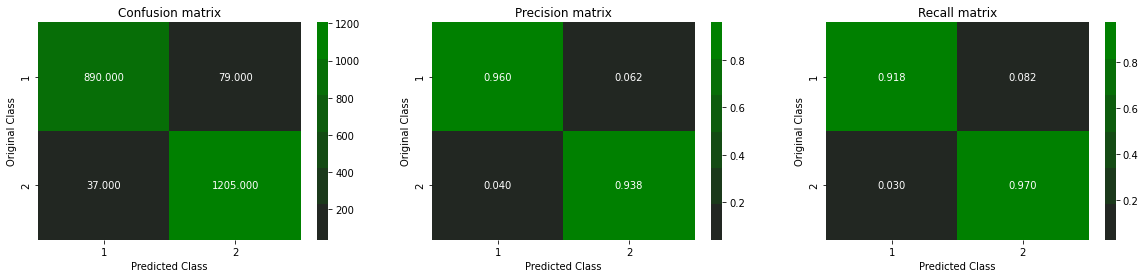

In [ ]:
plot_confusion_matrix(test_Y, xgb_predict)